False

In [51]:
import numpy as np,pandas as pd , torch , torchvision
from torchvision import datasets
from torch import nn
from torchvision import transforms
import matplotlib.pyplot as plt
import os
from helper_functions import walk_through_dir
from pathlib import Path

In [11]:
device = "cuda"
data_path = Path("data/")
image_path = data_path

walk_through_dir(image_path)

There are 3 directories and 0 images in 'data'.
There are 15 directories and 0 images in 'data\test'.
There are 0 directories and 200 images in 'data\test\Bean'.
There are 0 directories and 200 images in 'data\test\Bitter_Gourd'.
There are 0 directories and 200 images in 'data\test\Bottle_Gourd'.
There are 0 directories and 200 images in 'data\test\Brinjal'.
There are 0 directories and 200 images in 'data\test\Broccoli'.
There are 0 directories and 200 images in 'data\test\Cabbage'.
There are 0 directories and 200 images in 'data\test\Capsicum'.
There are 0 directories and 200 images in 'data\test\Carrot'.
There are 0 directories and 200 images in 'data\test\Cauliflower'.
There are 0 directories and 200 images in 'data\test\Cucumber'.
There are 0 directories and 200 images in 'data\test\Papaya'.
There are 0 directories and 200 images in 'data\test\Potato'.
There are 0 directories and 200 images in 'data\test\Pumpkin'.
There are 0 directories and 200 images in 'data\test\Radish'.
There 

data\train\Papaya\0636.jpg
Papaya


Text(0.5, 1.0, 'image class: Papaya | image shape : (224, 224, 3)')

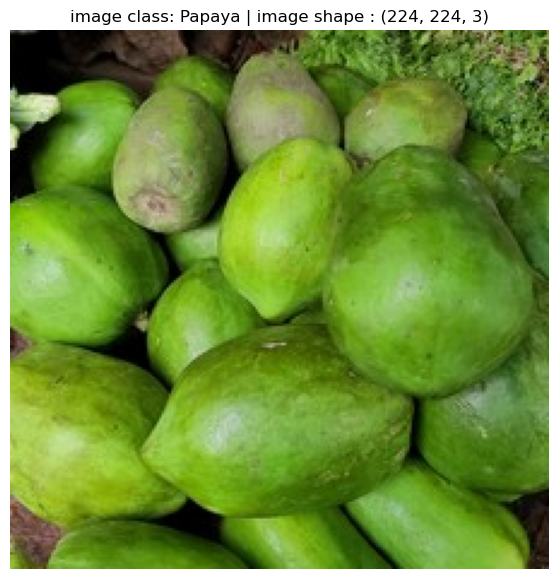

In [12]:
train_dir = image_path / "train"
test_dir = image_path / "test"


import random
from PIL import Image


image_path_list = list (image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)


image_class = random_image_path.parent.stem
print(image_class)


img = Image.open(random_image_path)

img_as_array = np.asarray(img)
plt.figure(figsize = (10, 7))
plt.imshow(img_as_array)
plt.axis(False)
plt.title(f"image class: {image_class} | image shape : {img_as_array.shape}")

In [13]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(root=train_dir ,
                                  transform=data_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir ,
                                 transform=data_transform,
                                 target_transform=None)

test_data , train_data

(Dataset ImageFolder
     Number of datapoints: 3000
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 15000
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [14]:
class_names  = train_data.classes
class_dict = train_data.class_to_idx
class_dict

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

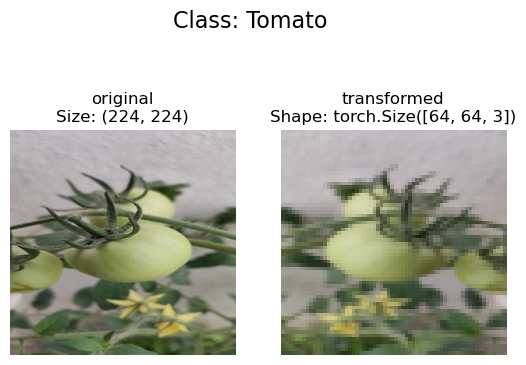

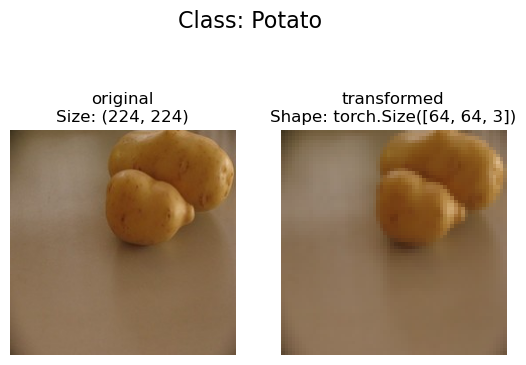

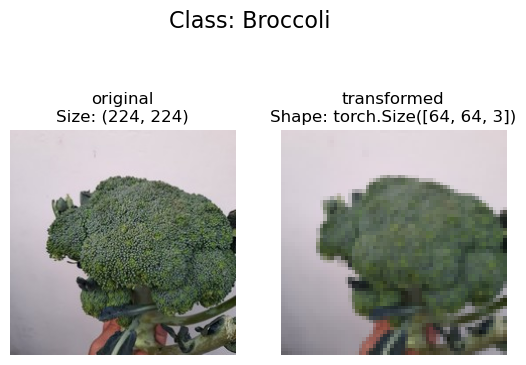

In [15]:
def plot_transformed_images(image_paths, transform, n=3 , seed = None):
    """
    selects random images from a path of images and load/transforms 
    them then plot the original vs the tra;nsformed version
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths , k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig , ax = plt.subplots(nrows=1 , ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"original\nSize: {f.size}")
            ax[0].axis(False)
            
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}",fontsize = 16)
            
plot_transformed_images(image_paths= image_path_list,
                        transform=data_transform,
                        n = 3)

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 150
NUM_WORKERS = os.cpu_count()
train_dataloader = DataLoader(dataset = train_data,batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle = True)



test_dataloader = DataLoader(dataset = test_data,batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle = True)

len(train_dataloader), len(test_dataloader)

(100, 20)

In [17]:
def display_random_images(dataset: torch.utils.data.Dataset,
                         classes ,
                         n: int = 10,
                         display_shape: bool = True,
                         seed: int = None):
    #adjust display
    if n > 10:
        n =10
        display_shape = False
        print(f"n shoildnt be larger then 10")
        
    if seed:
        random.seed(seed)
        
    random_sample_idx = random.sample(range(len(dataset)), k=n)
    
    
    plt.figure(figsize=(32,16))
    #loop through random indexes
    for i , targ_sample in enumerate(random_sample_idx):
        targ_image , targ_label = dataset[targ_sample][0],dataset[targ_sample][1]
        
        
        # adjust tensor dimentions
        
        targ_image_adjust= targ_image.permute(1,2,0)
        
        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title =  f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

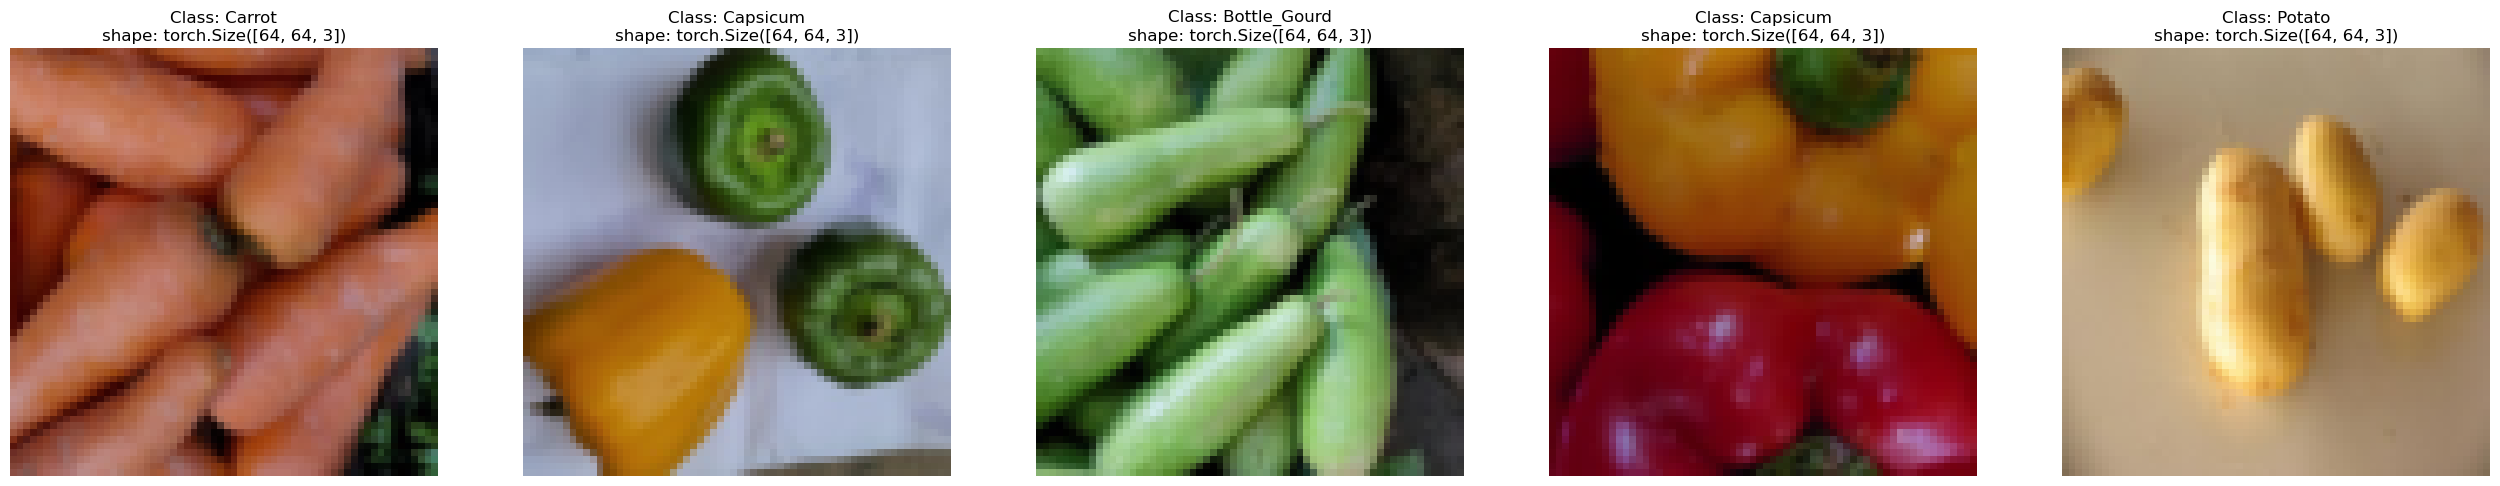

In [18]:
display_random_images(train_data,
                     n = 5,
                     classes = class_names,
                     seed = None)

In [32]:
class TinyVGG(nn.Module):
    """
    Model architecture that replicate the tinyvgg
    model from cnn explaner website.
    """
    def __init__(self, input_shape:int, hidden_units: int , output_shape : int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
        # creat a conv layer
        nn.Conv2d(in_channels= input_shape,
                 out_channels= hidden_units,
                 kernel_size=3,
                 stride = 1,
                 padding=1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels= hidden_units,
                 out_channels= hidden_units,
                 kernel_size=3,
                 stride = 1,
                 padding=1),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.conv_block_2= nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2)        
        )
        
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*256,
                     out_features=  output_shape)
        )
        
    def forward(self,x):
        
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))
        
        

In [33]:
model_0 = TinyVGG(input_shape=3 , hidden_units=10,output_shape=len(class_names))
image_batch , label_batch = next(iter(train_dataloader))
image_batch.shape , label_batch.shape

(torch.Size([150, 3, 64, 64]), torch.Size([150]))

In [ ]:
model_0(image_batch)

tensor([[-0.0461, -0.0416, -0.0650,  ..., -0.0053,  0.0426, -0.0008],
        [-0.0424, -0.0458, -0.0669,  ..., -0.0039,  0.0441, -0.0052],
        [-0.0468, -0.0429, -0.0660,  ..., -0.0068,  0.0434, -0.0005],
        ...,
        [-0.0458, -0.0406, -0.0666,  ..., -0.0065,  0.0398, -0.0011],
        [-0.0419, -0.0459, -0.0689,  ..., -0.0033,  0.0477, -0.0053],
        [-0.0463, -0.0404, -0.0658,  ..., -0.0058,  0.0455, -0.0036]],
       grad_fn=<AddmmBackward0>)

In [ ]:
from torchinfo import summary
summary(model_0 , input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 15]                   --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [20]:
from tqdm.auto import tqdm
def train_step(model : torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer):
    model.train()
    
    train_loss ,train_acc = 0,0
    
    for batch, (x,y) in enumerate(dataloader):
        # x,y = x.to(device),y.to(device)
        y_pred = model(x)
        
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred ,dim=1),dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        
    train_loss = train_loss/ len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss ,train_acc



def test_step(model : torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    
    model.eval()
    
    test_loss , test_acc = 0,0
    
    with torch.inference_mode():
        
        for batch,(x,y) in enumerate(dataloader):
            # x,y = x.to(device),y.to(device)
            
            test_pred_logits = model(x)
            
            loss = loss_fn(test_pred_logits , y)
            test_loss += loss.item()
            
            test_pred_labels  =  test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
        test_loss = test_loss / len(dataloader)
        test_acc = test_acc /len(dataloader)
        return test_loss , test_acc

    
    

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn:torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # create an empty result dictionary
    results = {"train_loss" : [],
              "train_acc": [],
              "test_loss": [],
              "test_acc": []}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model = model,
                                           dataloader=train_dataloader,
                                           loss_fn = loss_fn,
                                           optimizer=optimizer)
        
        test_loss, test_acc = test_step(model = model,
                                           dataloader=test_dataloader,
                                           loss_fn = loss_fn)
        
        # print whats happening
        print(f"Epoch: {epoch} | Train loss: {train_loss: .4f} | Train acc: {train_acc: .4f} | Test loss: {test_loss: .4f} | Test acc: {test_acc: .4f} ")
        
        # update result dic
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results
    
        
    

In [34]:
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr = 0.001)

from timeit import default_timer as timer
start_time = timer()
model_0_results = train(model= model_0,
                       train_dataloader=  train_dataloader,
                       test_dataloader= test_dataloader,
                       optimizer = optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss:  2.1315 | Train acc:  0.2959 | Test loss:  1.5805 | Test acc:  0.4847 
Epoch: 1 | Train loss:  1.3806 | Train acc:  0.5497 | Test loss:  1.2106 | Test acc:  0.5890 
Epoch: 2 | Train loss:  1.1103 | Train acc:  0.6492 | Test loss:  1.0783 | Test acc:  0.6423 
Epoch: 3 | Train loss:  0.9832 | Train acc:  0.6852 | Test loss:  0.9568 | Test acc:  0.6937 
Epoch: 4 | Train loss:  0.9000 | Train acc:  0.7136 | Test loss:  0.8263 | Test acc:  0.7420 


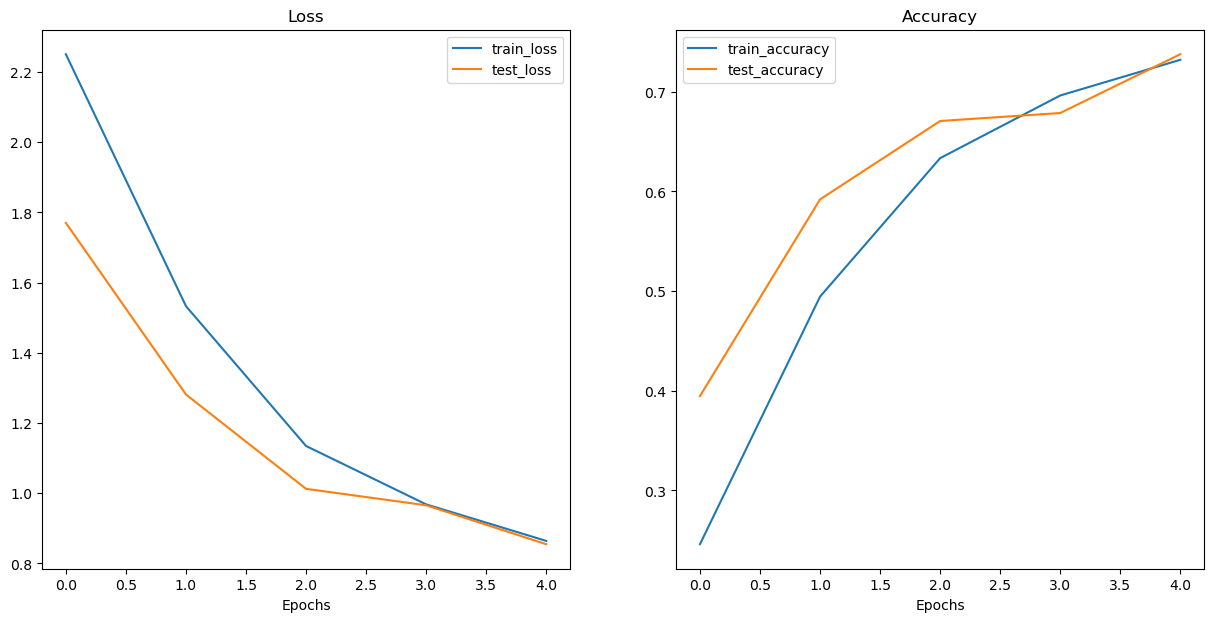

In [97]:
from helper_functions import plot_loss_curves
plot_loss_curves(model_0_results)

In [99]:
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                           transform=train_transform_trivial)

test_data_augmented = datasets.ImageFolder(root=test_dir,
                                           transform=test_transform_trivial)

In [104]:

train_dataloader_augmented = DataLoader(train_data_augmented,shuffle=True,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)
test_dataloader_augmented = DataLoader(test_data_augmented,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)
model_1 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data_augmented.classes))

In [105]:
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),lr = 0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model = model_1,
                       train_dataloader= train_dataloader_augmented,
                        test_dataloader= test_dataloader_augmented,
                       optimizer=optimizer,
                       loss_fn= loss_fn,
                       epochs=NUM_EPOCHS)

end_time = timer()
print(f"total training time for model_1: {end_time - start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss:  2.4080 | Train acc:  0.2083 | Test loss:  1.8936 | Test acc:  0.4077 
Epoch: 1 | Train loss:  1.9444 | Train acc:  0.3829 | Test loss:  1.3493 | Test acc:  0.5963 
Epoch: 2 | Train loss:  1.6387 | Train acc:  0.4889 | Test loss:  1.0845 | Test acc:  0.6783 
Epoch: 3 | Train loss:  1.4906 | Train acc:  0.5385 | Test loss:  0.9968 | Test acc:  0.6933 
Epoch: 4 | Train loss:  1.4102 | Train acc:  0.5635 | Test loss:  0.8950 | Test acc:  0.7317 
total training time for model_1: 365.242 seconds


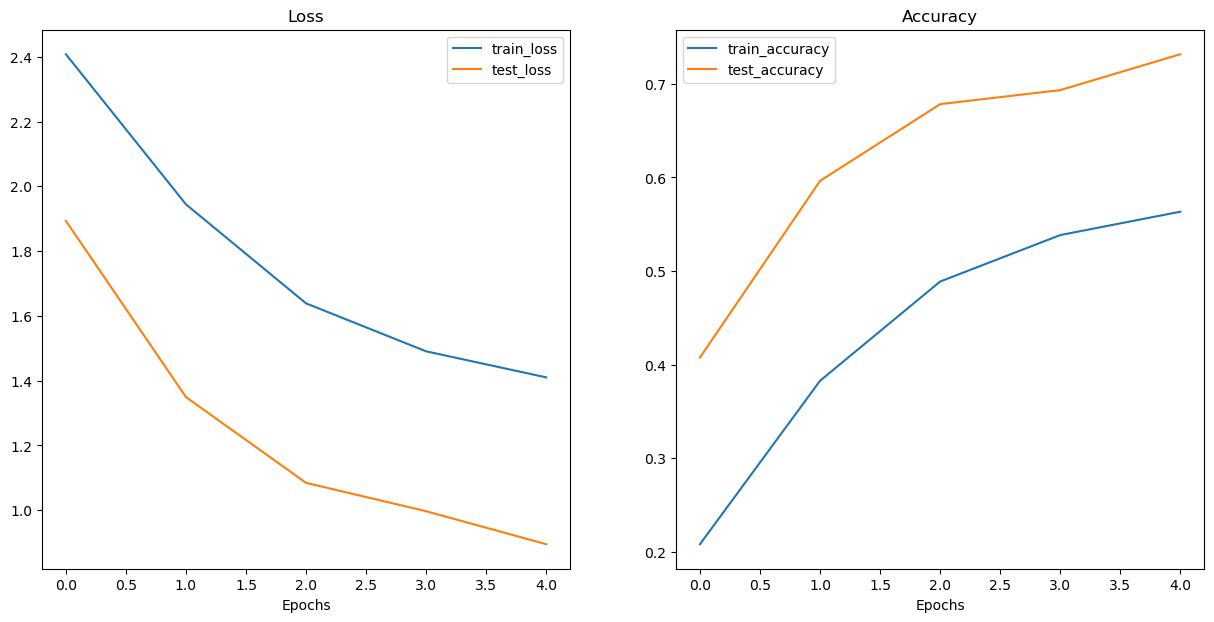

In [106]:
plot_loss_curves(model_1_results)

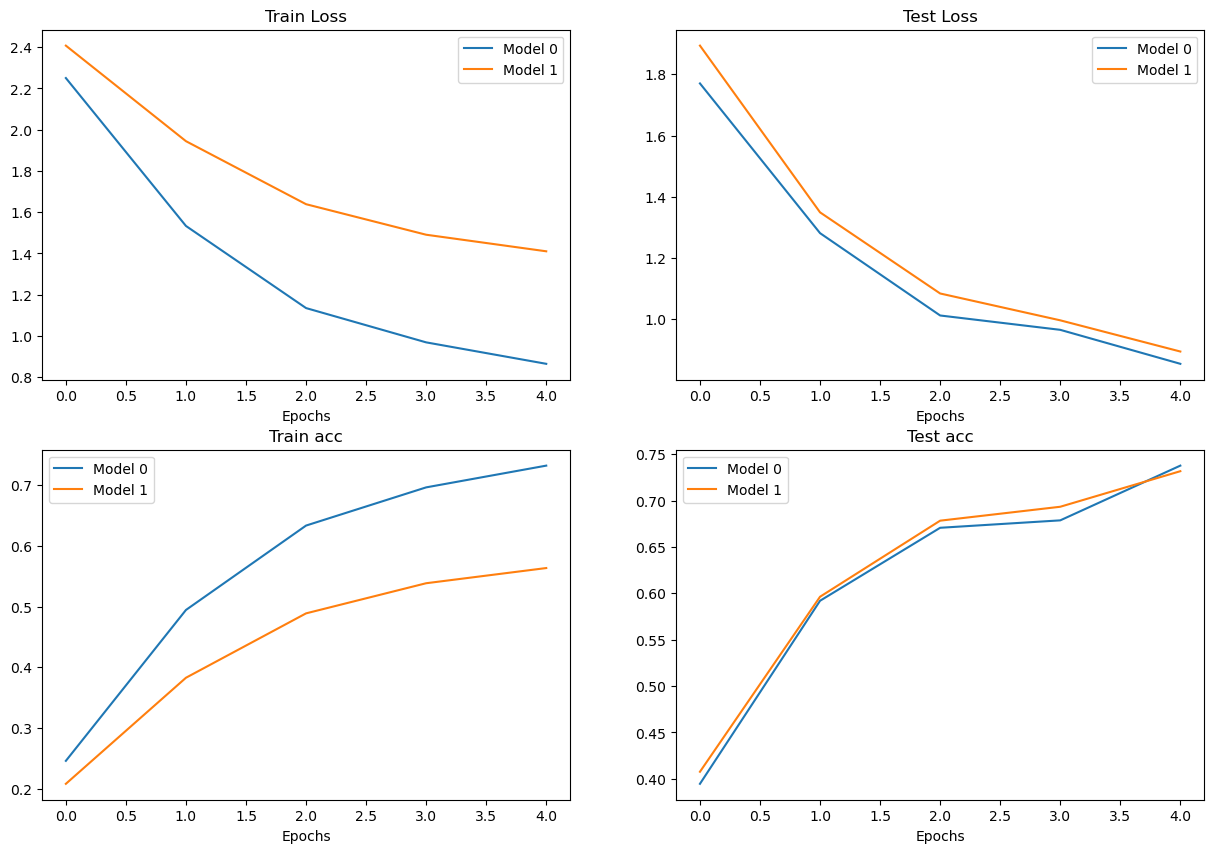

In [107]:
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs , model_0_df["train_loss"],label="Model 0")
plt.plot(epochs , model_1_df["train_loss"],label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs , model_0_df["test_loss"],label="Model 0")
plt.plot(epochs , model_1_df["test_loss"],label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()


plt.subplot(2,2,3)
plt.plot(epochs , model_0_df["train_acc"],label="Model 0")
plt.plot(epochs , model_1_df["train_acc"],label="Model 1")
plt.title("Train acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs , model_0_df["test_acc"],label="Model 0")
plt.plot(epochs , model_1_df["test_acc"],label="Model 1")
plt.title("Test acc")
plt.xlabel("Epochs")
plt.legend();

In [110]:

NUM_EPOCHS = 25

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr = 0.001)

start_time = timer()
model_0_results = train(model= model_0,
                       train_dataloader=  train_dataloader,
                       test_dataloader= test_dataloader,
                       optimizer = optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS)
end_time = timer()
print(f"total training time for model_1: {end_time - start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0 | Train loss:  2.4009 | Train acc:  0.1784 | Test loss:  2.0607 | Test acc:  0.3203 
Epoch: 1 | Train loss:  1.7550 | Train acc:  0.4407 | Test loss:  1.5148 | Test acc:  0.5213 
Epoch: 2 | Train loss:  1.4241 | Train acc:  0.5596 | Test loss:  1.3243 | Test acc:  0.5773 
Epoch: 3 | Train loss:  1.2775 | Train acc:  0.5957 | Test loss:  1.1594 | Test acc:  0.6197 
Epoch: 4 | Train loss:  1.1094 | Train acc:  0.6485 | Test loss:  1.0233 | Test acc:  0.6787 
Epoch: 5 | Train loss:  0.9415 | Train acc:  0.7065 | Test loss:  0.8778 | Test acc:  0.7197 
Epoch: 6 | Train loss:  0.8123 | Train acc:  0.7477 | Test loss:  0.7662 | Test acc:  0.7570 
Epoch: 7 | Train loss:  0.7090 | Train acc:  0.7857 | Test loss:  0.7101 | Test acc:  0.7863 
Epoch: 8 | Train loss:  0.6727 | Train acc:  0.7955 | Test loss:  0.6347 | Test acc:  0.8060 
Epoch: 9 | Train loss:  0.6118 | Train acc:  0.8150 | Test loss:  0.6252 | Test acc:  0.8043 
Epoch: 10 | Train loss:  0.5658 | Train acc:  0.8285 | Test 

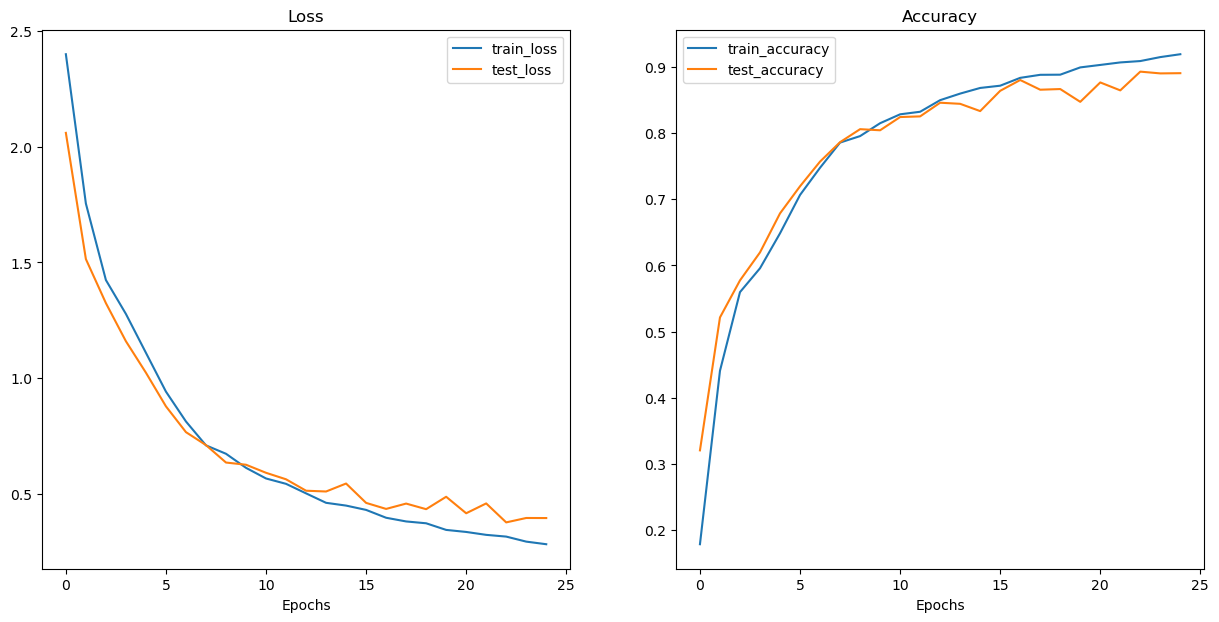

In [111]:
plot_loss_curves(model_0_results)

In [112]:
#1.create models directory
MODEL_PATH =  Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. creat model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model stat dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

saving model to: models\01_pytorch_workflow_model_0.pth


In [137]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample , label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)
    
test_samples[0].shape

torch.Size([3, 64, 64])

Text(0.5, 1.0, 'Tomato')

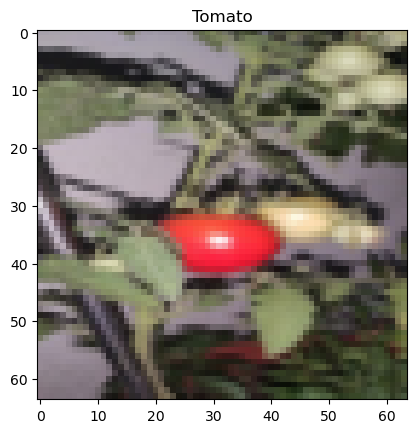

In [138]:
def make_predictions(model: torch.nn.Module,
                    data: list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample
            sample = torch.unsqueeze(sample , dim=0 )
            
            #forward pass
            pred_logit = model(sample)
            
            #get prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
            
            pred_probs.append(pred_prob)
            
            
    return torch.stack(pred_probs)
plt.imshow(test_samples[0].permute(1,2,0).squeeze())
plt.title(class_names[test_labels[0]])

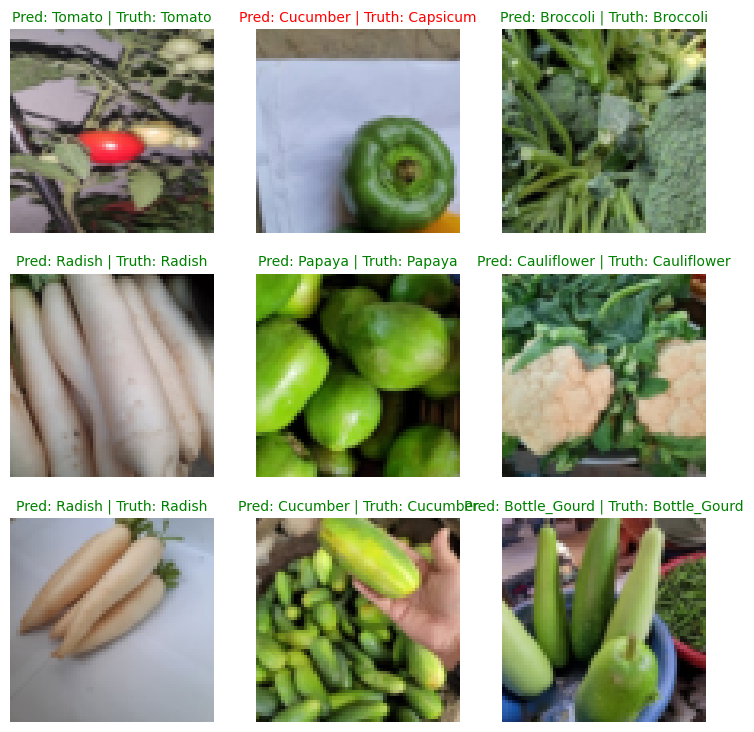

In [139]:
pred_probs = make_predictions(model=model_0,
                              data= test_samples)
pred_classes = pred_probs.argmax(dim=1)
# plot pred
plt.figure(figsize= (9,9))
nrows = 3
ncols = 3
for i , sample in enumerate(test_samples):
    
    plt.subplot(nrows , ncols , i+1)
    
    plt.imshow(sample.permute(1,2,0).squeeze())
    
    pred_label = class_names[pred_classes[i]]
    
    truth_label = class_names[test_labels[i]]
    
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    
    if pred_label ==  truth_label:
        plt.title(title_text , fontsize = 10,c = "g")
    else:
        plt.title(title_text , fontsize = 10,c = "r")
    plt.axis(False)

In [199]:
# import tdqm
from tqdm.auto import tqdm

y_preds = []
x_test = []
model_0.eval()
with torch.inference_mode():
    for x,y in tqdm(test_dataloader,desc = "making predictions..."):
        y_logit = model_0(x)
        
        y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        
        y_preds.append(y_pred)
        x_test.append(y)
        
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
x_test_cat = torch.cat(x_test)
y_pred_tensor[:10]  , x_test[:10]

making predictions...:   0%|          | 0/20 [00:28<?, ?it/s]

(tensor([ 8,  4, 11, 11, 13,  7, 12,  7, 13, 14]),
 [tensor([14,  4, 11, 11, 13,  7, 12,  7, 13,  7,  2, 11,  0,  1, 13,  0, 10,  4,
           8,  1, 14,  9, 14, 13, 10,  8,  6,  4,  6,  8, 14,  2, 13,  7,  5, 11,
           7,  9,  6,  1,  9,  0, 12, 12, 12,  7,  6,  6,  9, 10,  8, 13,  2,  0,
           4,  7,  5,  4, 11, 12,  4,  5, 13,  8, 12,  9, 14,  0,  1,  2, 11, 13,
           7,  6, 14, 13, 12,  0, 10, 11, 10,  9, 10, 13,  0,  2,  9,  8, 14, 11,
           0,  2,  6,  3,  8, 11, 11,  0,  1,  9,  2,  4,  5, 11,  7, 13,  4,  9,
          13,  5,  5, 10,  8, 12, 10, 10,  8,  6,  1, 11, 14,  1,  8,  4,  1, 13,
           1,  2, 14, 12, 12,  5,  4, 12,  7,  5, 14, 11,  2, 10,  5,  5, 12,  6,
           3,  2,  4, 12,  5,  5]),
  tensor([11,  6,  2,  0,  8,  7, 12, 10,  2,  1, 10,  6, 14,  3,  9, 14,  9,  7,
           4, 13, 11,  0, 10,  9,  3,  9, 11,  4,  8,  2, 10,  1, 14,  5, 11,  6,
          11,  2,  4,  5,  0,  9, 13,  7, 14, 10, 11, 11,  0,  4,  1,  6, 11, 13,
          1

In [203]:
y_pred_tensor[:10] , x_test_cat[:10]


(tensor([ 8,  4, 11, 11, 13,  7, 12,  7, 13, 14]),
 tensor([14,  4, 11, 11, 13,  7, 12,  7, 13,  7]))

In [201]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_tensor,x_test_cat)
cm

array([[ 81,   7,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,
          0,   0],
       [ 13, 117,   1,   0,   1,   1,   0,   0,   1,   2,   0,   0,   0,
          0,   0],
       [  1,   1, 149,   6,   0,   0,   1,   0,   0,   4,  12,   0,   0,
          0,   0],
       [ 14,  15,  28, 161,   0,   4,   0,   0,   0,  28,  48,   0,   0,
          0,   1],
       [  3,   1,   0,   0, 103,   0,   0,   0,   1,   0,   0,   0,   2,
          0,   0],
       [ 23,  19,   4,  12,  32, 170,   2,   0,   2,   6,   3,   6,   9,
          1,  19],
       [  5,   1,   2,   1,   1,   0, 171,   0,   0,   0,  14,   0,   0,
          0,   2],
       [  0,   1,   0,   0,   0,   0,   1, 187,   0,   0,   1,   6,   0,
          1,   2],
       [ 28,  15,   1,   3,  22,   9,   0,   0, 181,  20,   2,   3,   6,
         65,  25],
       [ 10,   9,   1,   2,   4,   0,   1,   0,   0, 128,   4,   0,   0,
          0,   0],
       [  1,   1,   2,   3,   0,   1,   0,   0,   1,   0, 112,   0,   0,
       

In [205]:
ConfusionMatrixDisplay?

Init signature: ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)
Docstring:     
Confusion Matrix visualization.

It is recommend to use
:func:`~sklearn.metrics.ConfusionMatrixDisplay.from_estimator` or
:func:`~sklearn.metrics.ConfusionMatrixDisplay.from_predictions` to
create a :class:`ConfusionMatrixDisplay`. All parameters are stored as
attributes.

Read more in the :ref:`User Guide <visualizations>`.

Parameters
----------
confusion_matrix : ndarray of shape (n_classes, n_classes)
    Confusion matrix.

display_labels : ndarray of shape (n_classes,), default=None
    Display labels for plot. If None, display labels are set from 0 to
    `n_classes - 1`.

Attributes
----------
im_ : matplotlib AxesImage
    Image representing the confusion matrix.

text_ : ndarray of shape (n_classes, n_classes), dtype=matplotlib Text,             or None
    Array of matplotlib axes. `None` if `include_values` is false.

ax_ : matplotlib Axes
    Axes with confusion matrix.

figure_

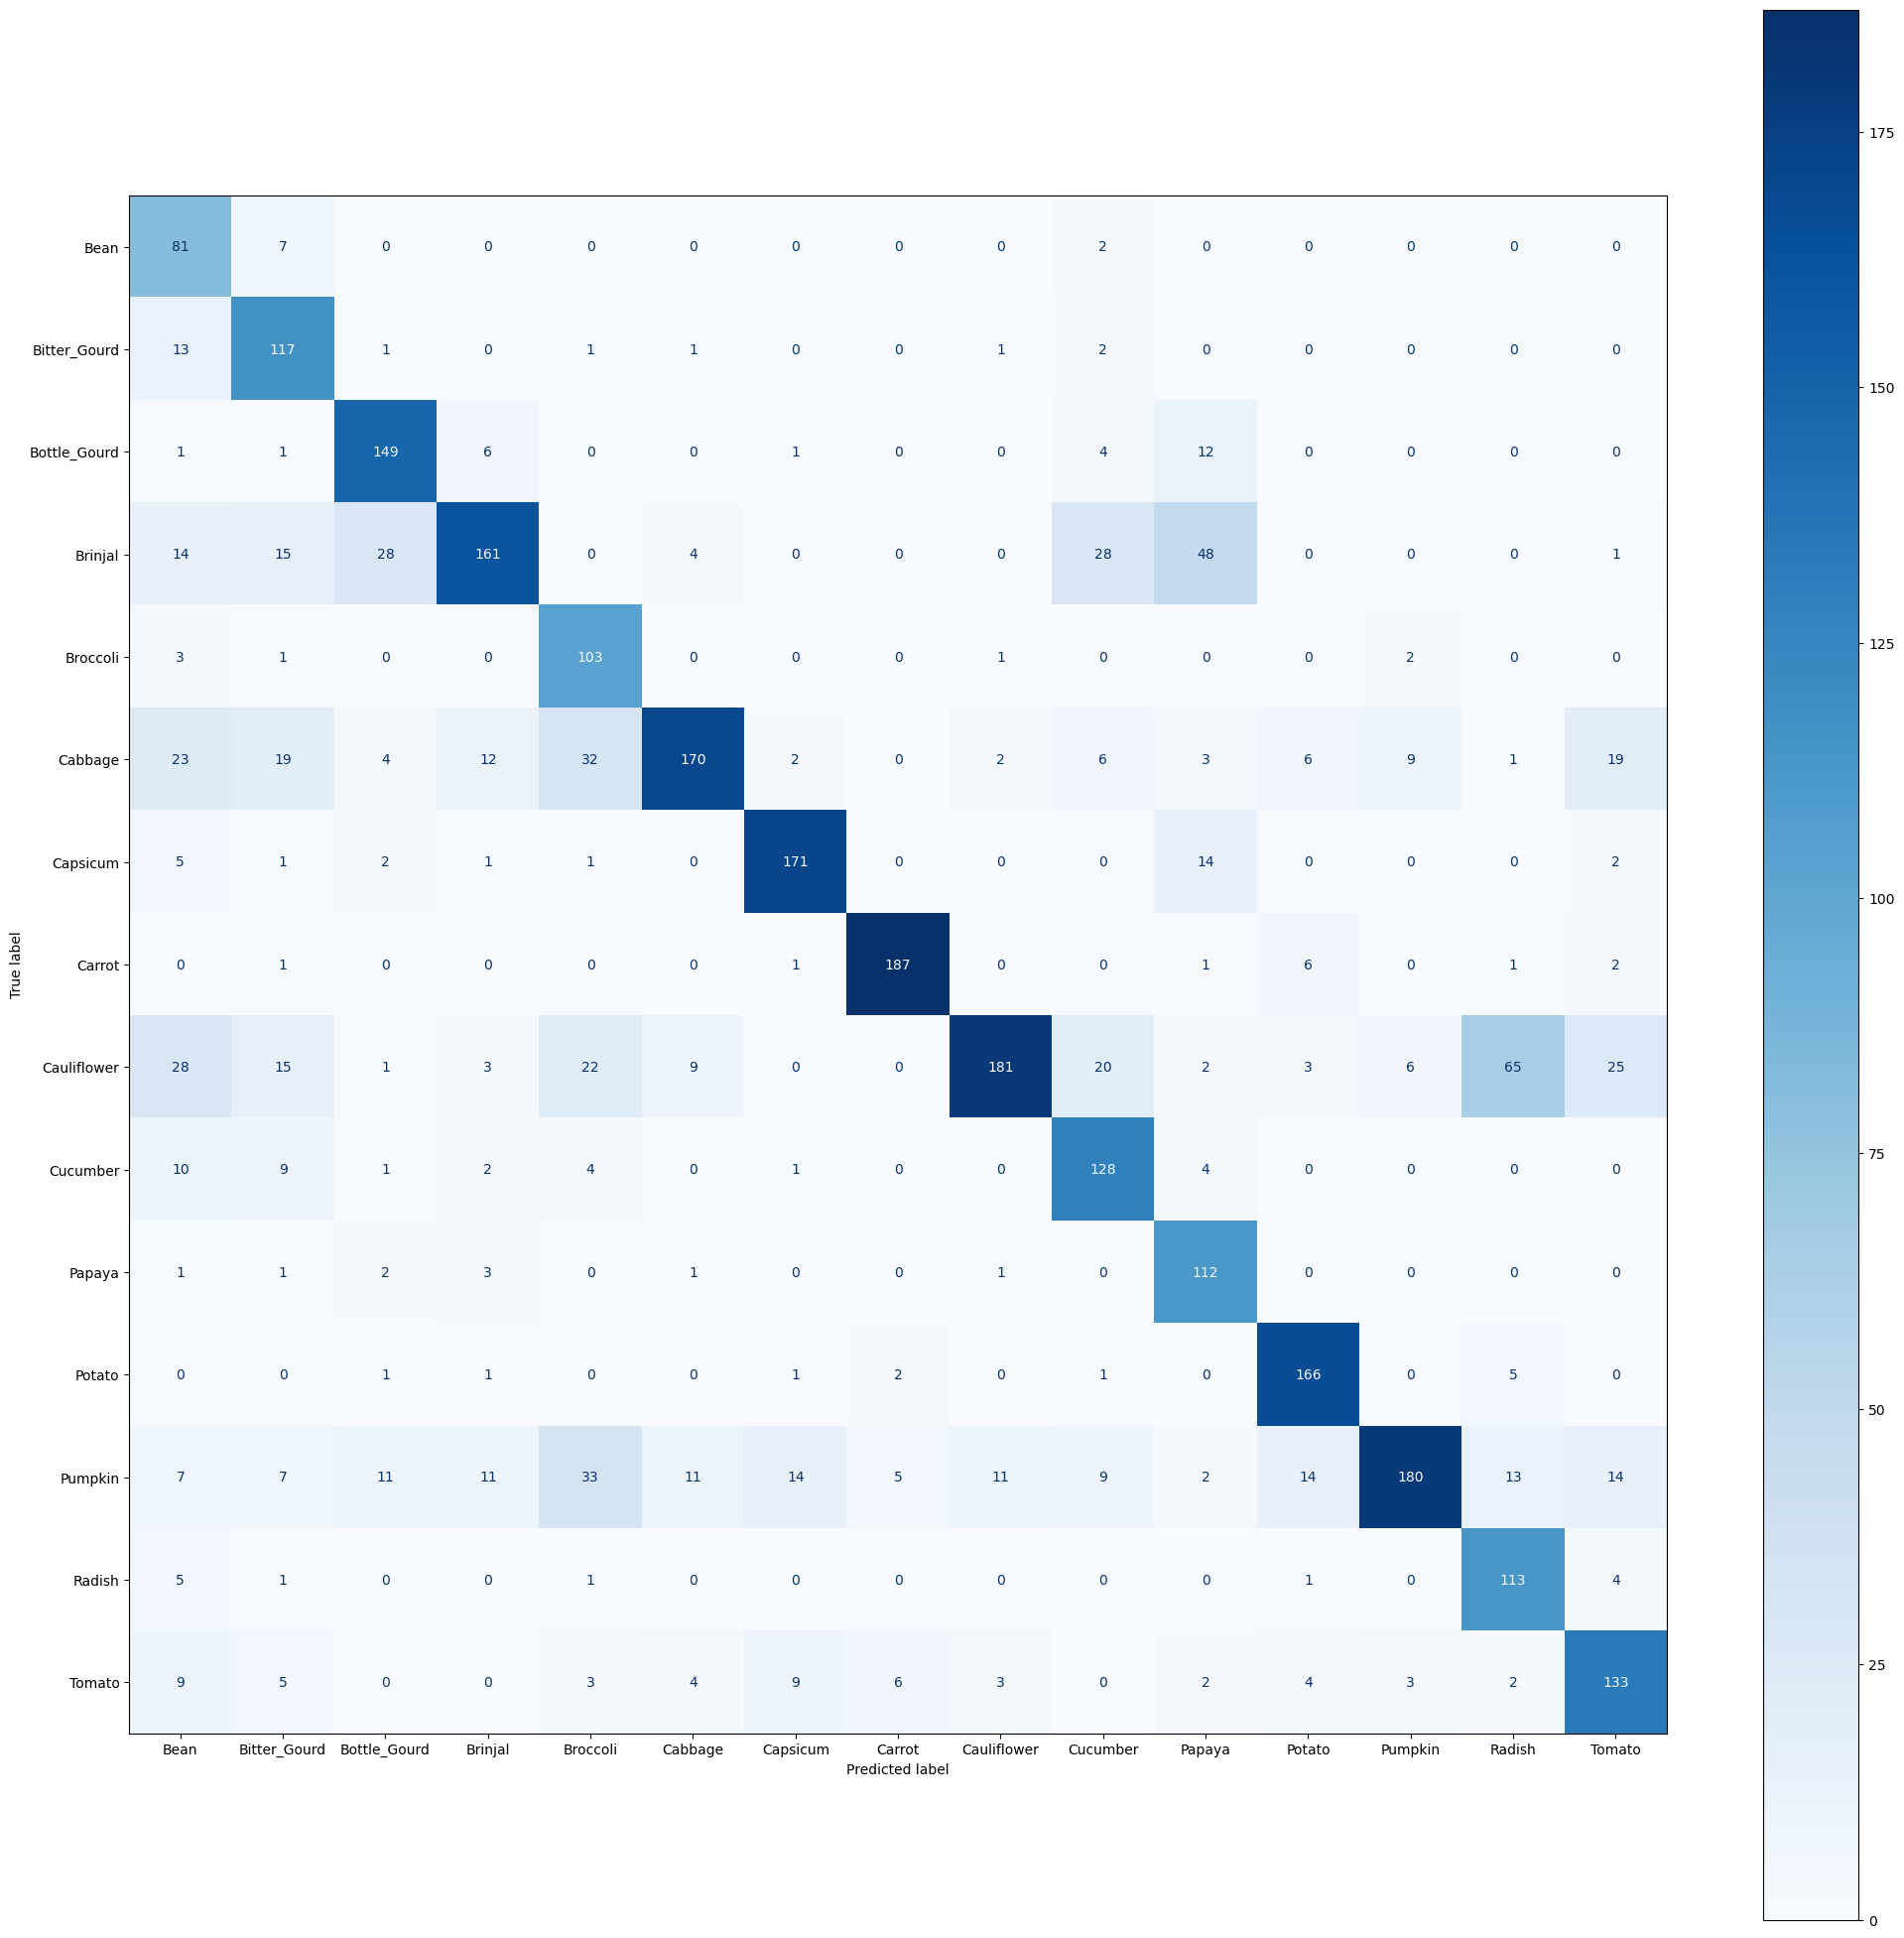

In [228]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(25,25))
disp.plot(ax=ax ,cmap=plt.cm.Blues)

# model_1 mass train

In [141]:
NUM_EPOCHS = 25

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),lr = 0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model = model_1,
                       train_dataloader= train_dataloader_augmented,
                        test_dataloader= test_dataloader_augmented,
                       optimizer=optimizer,
                       loss_fn= loss_fn,
                       epochs=NUM_EPOCHS)

end_time = timer()
print(f"total training time for model_1: {end_time - start_time:.3f} seconds")


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0 | Train loss:  0.8603 | Train acc:  0.7313 | Test loss:  0.4056 | Test acc:  0.8733 
Epoch: 1 | Train loss:  0.8501 | Train acc:  0.7388 | Test loss:  0.4188 | Test acc:  0.8753 
Epoch: 2 | Train loss:  0.8031 | Train acc:  0.7493 | Test loss:  0.3659 | Test acc:  0.8950 
Epoch: 3 | Train loss:  0.8085 | Train acc:  0.7529 | Test loss:  0.3629 | Test acc:  0.8897 
Epoch: 4 | Train loss:  0.7968 | Train acc:  0.7520 | Test loss:  0.3735 | Test acc:  0.8883 
Epoch: 5 | Train loss:  0.7876 | Train acc:  0.7507 | Test loss:  0.3841 | Test acc:  0.8857 
Epoch: 6 | Train loss:  0.7951 | Train acc:  0.7520 | Test loss:  0.3898 | Test acc:  0.8823 
Epoch: 7 | Train loss:  0.7663 | Train acc:  0.7605 | Test loss:  0.3808 | Test acc:  0.8853 
Epoch: 8 | Train loss:  0.7843 | Train acc:  0.7553 | Test loss:  0.3715 | Test acc:  0.8873 
Epoch: 9 | Train loss:  0.7797 | Train acc:  0.7565 | Test loss:  0.3805 | Test acc:  0.8867 
Epoch: 10 | Train loss:  0.7596 | Train acc:  0.7604 | Test 

In [182]:
#1.create models directory
MODEL_PATH =  Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. creat model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model stat dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

saving model to: models\01_pytorch_workflow_model_1.pth


# VGG16

In [24]:
class VGG16(nn.Module):
    """
    Model architecture that replicate the tinyvgg
    model from cnn explaner website.
    """
    def __init__(self, input_shape:int, hidden_units: int , output_shape : int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
        # creat a conv layer
        nn.Conv2d(in_channels= input_shape,
                 out_channels= hidden_units,
                 kernel_size=3,
                 stride = 1,
                 padding=3),
            nn.ReLU(),
            
            nn.Conv2d(in_channels= hidden_units,
                 out_channels= hidden_units,
                 kernel_size=3,
                 stride = 1,
                 padding=3),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2 , stride=2)
        )
        
        self.conv_block_2= nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=3),
            nn.ReLU(),
            
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=3),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2, stride=2)        
        )
        
        self.conv_block_3= nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=3),
            nn.ReLU(),
            
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=3),
            nn.ReLU(),
            
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=3),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2, stride=2)        
        )
        
        self.conv_block_4= nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=3),
            nn.ReLU(),
            
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=3),
            nn.ReLU(),
            
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=3),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2, stride=2)        
        )
        
        self.conv_block_5= nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=3),
            nn.ReLU(),
            
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=3),
            nn.ReLU(),
            
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=3),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2, stride=2)        
        )
            
            
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*169,
                     out_features=  output_shape)
        )
        
    def forward(self,x):
        
        return self.classifier(self.conv_block_4((self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))))
        
        

In [28]:
model_3 = VGG16(input_shape=3 , hidden_units=10,output_shape=len(class_names))

In [30]:
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),lr = 0.01)

from timeit import default_timer as timer
start_time = timer()

model_3_results = train(model = model_3,
                       train_dataloader= train_dataloader,
                        test_dataloader= test_dataloader,
                       optimizer=optimizer,
                       loss_fn= loss_fn,
                       epochs=NUM_EPOCHS)

end_time = timer()
print(f"total training time for model_3: {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss:  12.4392 | Train acc:  0.0667 | Test loss:  12.2865 | Test acc:  0.0667 
Epoch: 1 | Train loss:  11.8845 | Train acc:  0.0667 | Test loss:  11.4922 | Test acc:  0.0667 
Epoch: 2 | Train loss:  11.1514 | Train acc:  0.0667 | Test loss:  10.8292 | Test acc:  0.0667 
Epoch: 3 | Train loss:  10.5636 | Train acc:  0.0667 | Test loss:  10.3163 | Test acc:  0.0667 


KeyboardInterrupt: 

In [236]:
from torchinfo import summary
summary(model_3 , input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
VGG16                                    [1, 15]                   2,730
├─Sequential: 1-1                        [1, 10, 36, 36]           --
│    └─Conv2d: 2-1                       [1, 10, 68, 68]           280
│    └─ReLU: 2-2                         [1, 10, 68, 68]           --
│    └─Conv2d: 2-3                       [1, 10, 72, 72]           910
│    └─ReLU: 2-4                         [1, 10, 72, 72]           --
│    └─MaxPool2d: 2-5                    [1, 10, 36, 36]           --
├─Sequential: 1-2                        [1, 10, 22, 22]           --
│    └─Conv2d: 2-6                       [1, 10, 40, 40]           910
│    └─ReLU: 2-7                         [1, 10, 40, 40]           --
│    └─Conv2d: 2-8                       [1, 10, 44, 44]           910
│    └─ReLU: 2-9                         [1, 10, 44, 44]           --
│    └─MaxPool2d: 2-10                   [1, 10, 22, 22]           --
├─Sequen

In [9]:
model_4 = torchvision.models.vgg16().to(device)


In [10]:
from torchinfo import summary
summary(model_4 , input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 2, 2]            --
│    └─Conv2d: 2-1                       [1, 64, 64, 64]           1,792
│    └─ReLU: 2-2                         [1, 64, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 64, 64, 64]           36,928
│    └─ReLU: 2-4                         [1, 64, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 64, 32, 32]           --
│    └─Conv2d: 2-6                       [1, 128, 32, 32]          73,856
│    └─ReLU: 2-7                         [1, 128, 32, 32]          --
│    └─Conv2d: 2-8                       [1, 128, 32, 32]          147,584
│    └─ReLU: 2-9                         [1, 128, 32, 32]          --
│    └─MaxPool2d: 2-10                   [1, 128, 16, 16]          --
│    └─Conv2d: 2-11                      [1, 256, 16, 16]          29

In [23]:
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_4.parameters(),lr = 0.02)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model = model_4,
                       train_dataloader= train_dataloader,
                        test_dataloader= test_dataloader,
                       optimizer=optimizer,
                       loss_fn= loss_fn,
                       epochs=NUM_EPOCHS)

end_time = timer()
print(f"total training time for model_3: {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [48]:
model_5 = torchvision.models.vgg16(weights=torchvision.models.VGG16_Weights)
summary(model_5 )

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\POUYA/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [01:23<00:00, 6.65MB/s] 


Layer (type:depth-idx)                   Param #
VGG                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,792
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       36,928
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
│    └─Conv2d: 2-6                       73,856
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       147,584
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
│    └─Conv2d: 2-11                      295,168
│    └─ReLU: 2-12                        --
│    └─Conv2d: 2-13                      590,080
│    └─ReLU: 2-14                        --
│    └─Conv2d: 2-15                      590,080
│    └─ReLU: 2-16                        --
│    └─MaxPool2d: 2-17                   --
│    └─Conv2d: 2-18                      1,180,160
│    └─ReLU: 2-19                

In [49]:
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_5.parameters(),lr = 0.01)

from timeit import default_timer as timer
start_time = timer()

model_5_results = train(model = model_5,
                       train_dataloader= train_dataloader,
                        test_dataloader= test_dataloader,
                       optimizer=optimizer,
                       loss_fn= loss_fn,
                       epochs=NUM_EPOCHS)

end_time = timer()
print(f"total training time for model_5: {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss:  300583024.8106 | Train acc:  0.0667 | Test loss:  5.1277 | Test acc:  0.0667 
Epoch: 1 | Train loss:  5.7385 | Train acc:  0.0677 | Test loss:  2.7230 | Test acc:  0.0667 
Epoch: 2 | Train loss:  3.2040 | Train acc:  0.0677 | Test loss:  2.7119 | Test acc:  0.0653 
Epoch: 3 | Train loss:  662.9224 | Train acc:  0.0678 | Test loss:  3.6906 | Test acc:  0.0667 
Epoch: 4 | Train loss:  303208.3552 | Train acc:  0.0652 | Test loss:  2.9926 | Test acc:  0.0667 
total training time for model_5: 5633.609 seconds


In [50]:
model_din = torchvision.models.vgg11()

In [52]:
model_din(image_batch)

tensor([[-0.0086,  0.0106,  0.0440,  ..., -0.0201, -0.0141, -0.0196],
        [-0.0051, -0.0229,  0.0079,  ...,  0.0006,  0.0313, -0.0224],
        [ 0.0092, -0.0051,  0.0511,  ..., -0.0250,  0.0110, -0.0066],
        ...,
        [ 0.0489,  0.0138, -0.0142,  ...,  0.0266,  0.0528, -0.0118],
        [ 0.0213,  0.0478,  0.0496,  ...,  0.0007, -0.0334,  0.0185],
        [ 0.0387, -0.0017,  0.0207,  ...,  0.0178, -0.0184, -0.0171]],
       grad_fn=<AddmmBackward0>)